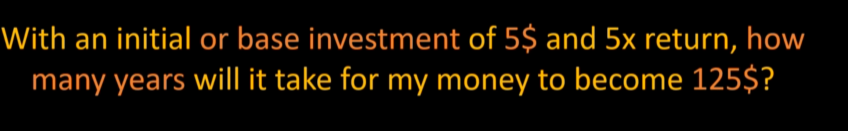

In [9]:
import math
math.log(125, 5)


# it takes three year

3.0000000000000004

In [1]:
import pandas as pd
file_name = r"D:\Brainwired\FarmTestDataClean\live_label_merge_data\FinalMergedData28Hz_LiveLable.csv"

live_label_data = pd.read_csv(file_name)
live_label_data['tag']= 5
live_label_data.reset_index(drop=True,inplace=True)
print(live_label_data.shape)
print(live_label_data.date.unique())

live_label_data['activity'] = live_label_data['primary'] + "_" + live_label_data['secondary']


(516880, 8)
['2024-07-03' '2024-07-04']


<Axes: xlabel='activity', ylabel='count'>

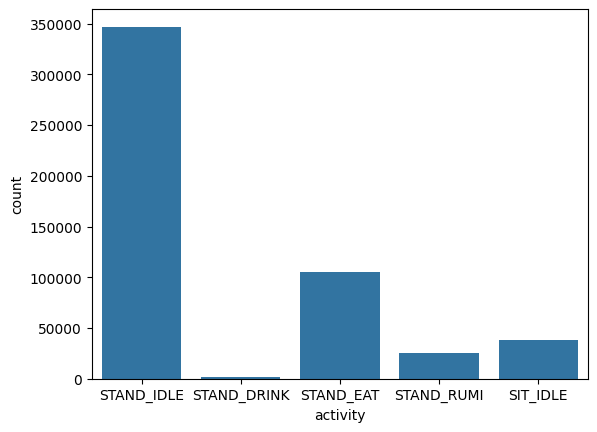

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=live_label_data,x='activity',log_scale=False)

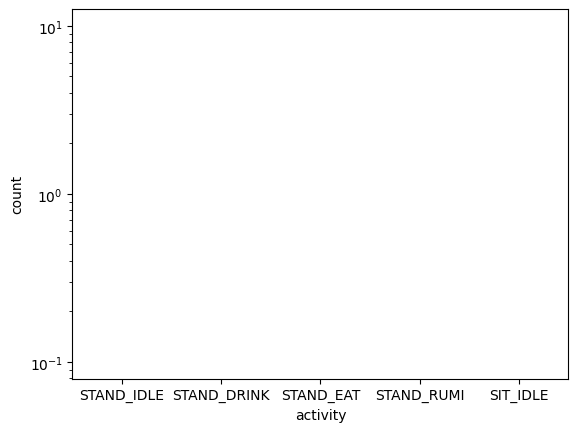

In [43]:
sns.countplot(data=live_label_data,x='activity',log_scale=True)
plt.show()

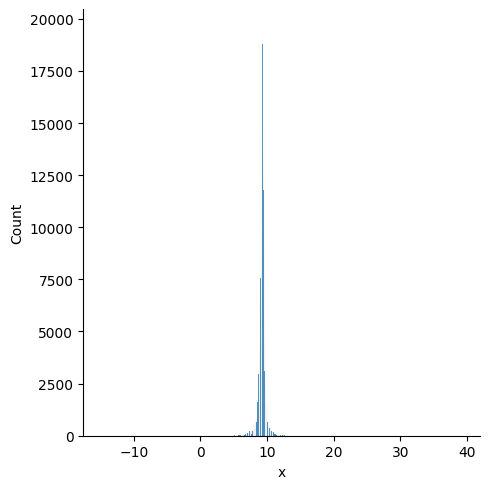

In [44]:
sns.displot(live_label_data['x'])

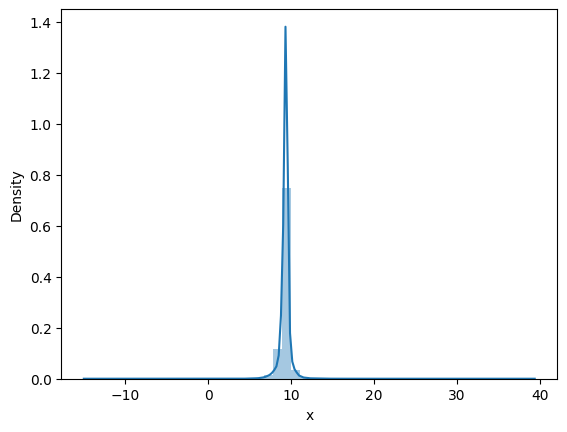

In [45]:
sns.distplot(live_label_data['x'])
plt.show()

In [46]:
live_label_data.shape

(516880, 9)

In [ ]:
# z_score is method use to detect the outliers it detect all data point fall outside the 3rd std deviation
# from below method we use two different code but approach remain same

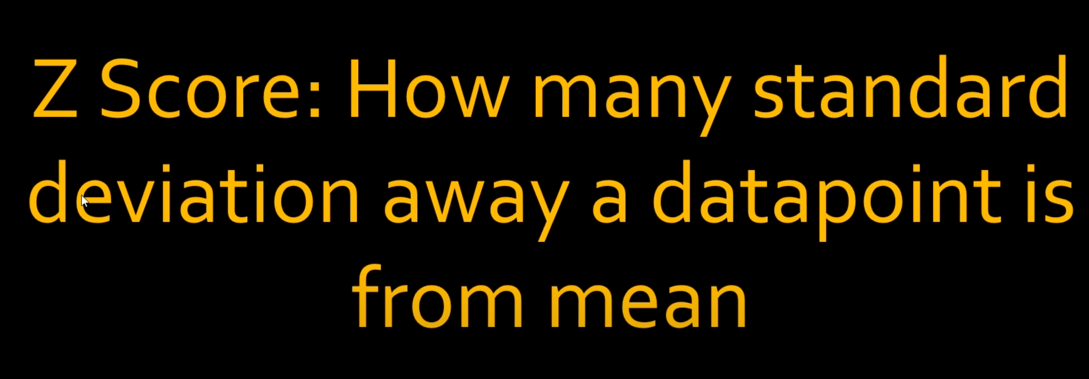

In [3]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(live_label_data['x'])
print("Outliers from Z-scores method: ", len(sample_outliers))




std = live_label_data['x'].std()
mean = live_label_data['x'].mean()

pos = mean + 3*std
neg = mean - 3*std

live_label_data['x'][~((live_label_data['x'] >= neg) & (live_label_data['x'] <= pos))]   # with outliers

Outliers from Z-scores method:  10225


2235      11.9904
2236      11.7797
2237      11.4541
2238      13.2163
2241       6.1101
           ...   
515670    11.2434
515671    11.8180
515672     6.6081
515673     5.8994
516002    11.3009
Name: x, Length: 10225, dtype: float64

In [8]:
# THis may be called as z-Score outlier detection



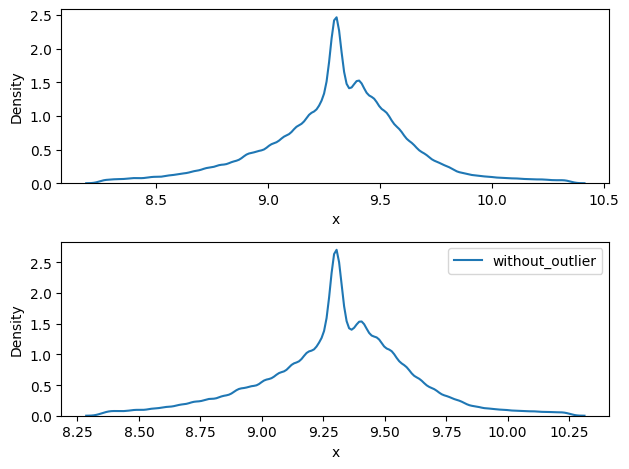

In [9]:
std = live_label_data['x'].std()
mean = live_label_data['x'].mean()

pos = mean + 3*std
neg = mean - 3*std

# print(mean)

# print(neg)
# print(pos)

import warnings
warnings.filterwarnings('ignore')
fig,axes= plt.subplots(2,1)
sns.kdeplot(live_label_data['x'],ax=axes[0],label='with_outlier')


# Correct condition to check if values fall within one standard deviation
mean_val= live_label_data['x'][(live_label_data['x'] >= neg) & (live_label_data['x'] <= pos)].mean()
live_label_data['x'][~((live_label_data['x'] >= neg) & (live_label_data['x'] <= pos))] = mean_val

live_label_data[((live_label_data['x'] >= neg) & (live_label_data['x'] <= pos))]
sns.kdeplot(live_label_data['x'],ax=axes[1],label='without_outlier')
plt.tight_layout()
plt.legend()
plt.show()

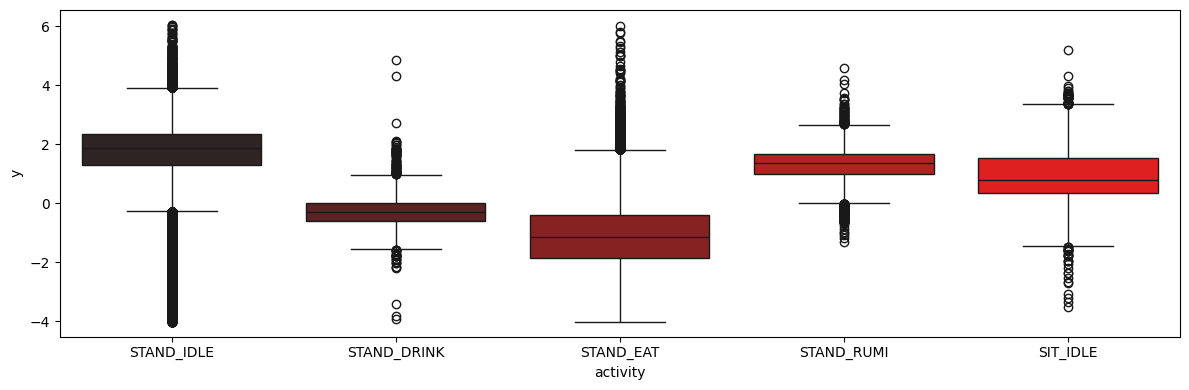

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=live_label_data, x='activity', y='y', color='red', hue='activity')
plt.tight_layout()
plt.show()

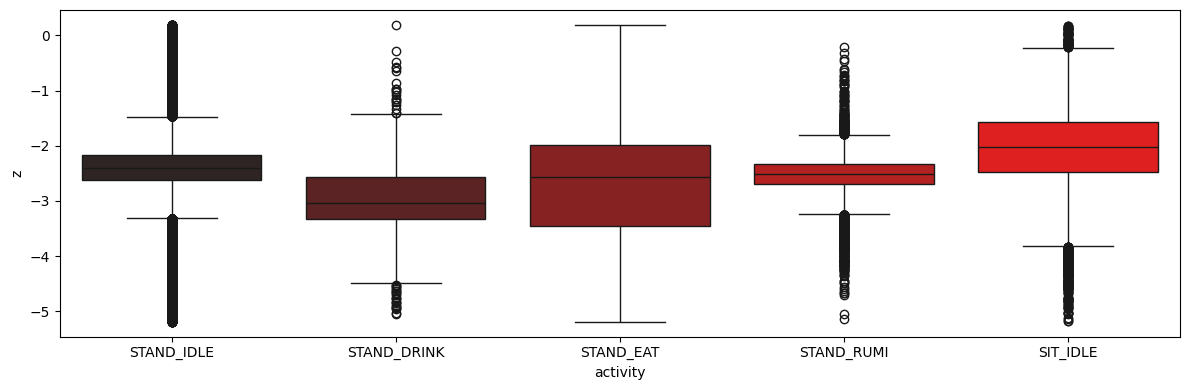

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=live_label_data, x='activity', y='z', color='red', hue='activity')
plt.tight_layout()
plt.show()


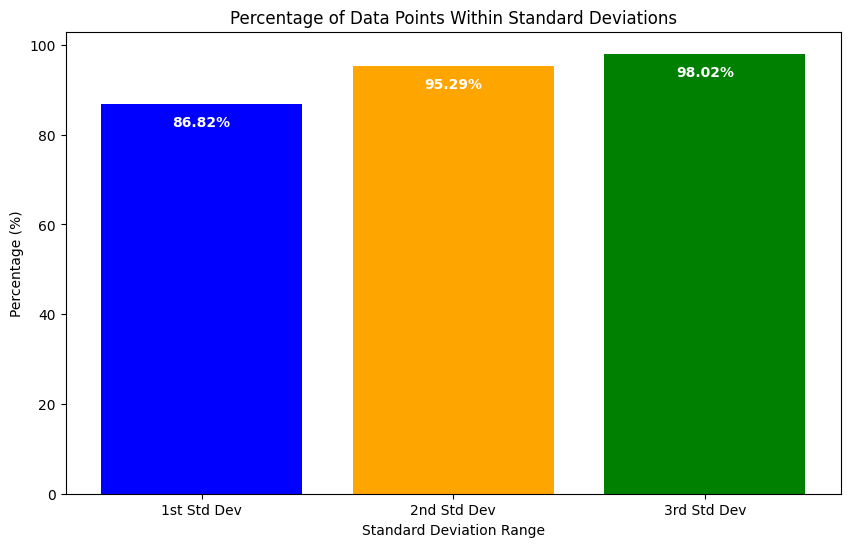

In [36]:
import matplotlib.pyplot as plt

# Calculate standard deviation and mean
std = live_label_data['x'].std()
mean = live_label_data['x'].mean()

# Define the ranges for each standard deviation
ranges = [(mean - std, mean + std),
          (mean - 2*std, mean + 2*std),
          (mean - 3*std, mean + 3*std)]

# Calculate the percentage of data points within each range
percentages = []
for low, high in ranges:
    count = live_label_data[(live_label_data['x'] >= low) & (live_label_data['x'] <= high)].shape[0]
    percentage = (count / live_label_data.shape[0]) * 100
    percentages.append(percentage)

# Define labels for each standard deviation range
labels = ['1st Std Dev', '2nd Std Dev', '3rd Std Dev']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=['blue', 'orange', 'green'])

# Annotate the bars with the percentage values
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{percentage:.2f}%', ha='center', color='white', fontweight='bold')

# Add titles and labels
plt.title('Percentage of Data Points Within Standard Deviations')
plt.xlabel('Standard Deviation Range')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


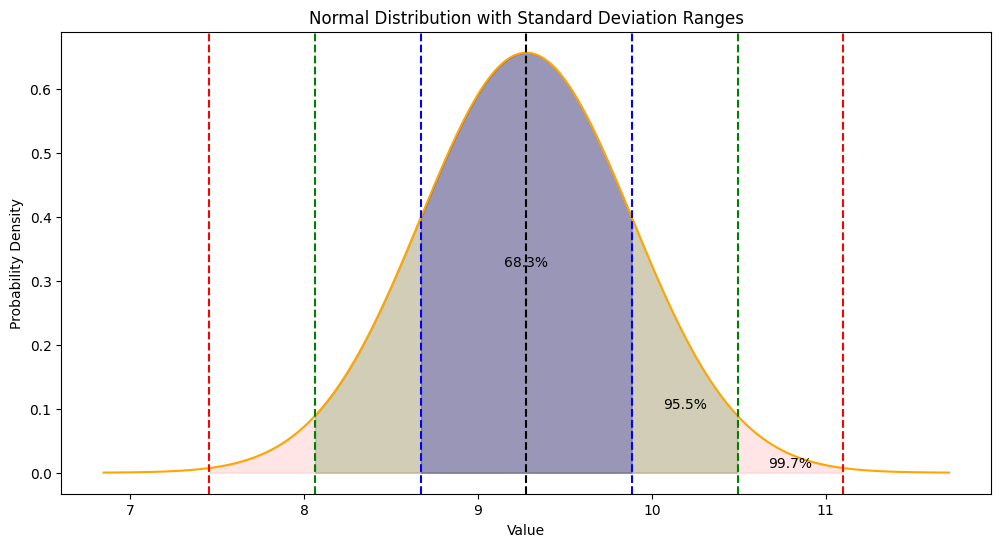

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data
mean = live_label_data['x'].mean()
std = live_label_data['x'].std()
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)

# Calculate percentages
percentages = [68.27, 95.45, 99.73]

# Plot the normal distribution curve
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='orange')

# Fill the areas under the curve
plt.fill_between(x, 0, y, where=(x >= mean - std) & (x <= mean + std), color='blue', alpha=0.3)
plt.fill_between(x, 0, y, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='green', alpha=0.2)
plt.fill_between(x, 0, y, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.1)

# Add vertical lines for mean and std devs
plt.axvline(mean, color='black', linestyle='--')
plt.axvline(mean - std, color='blue', linestyle='--')
plt.axvline(mean + std, color='blue', linestyle='--')
plt.axvline(mean - 2*std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='green', linestyle='--')
plt.axvline(mean - 3*std, color='red', linestyle='--')
plt.axvline(mean + 3*std, color='red', linestyle='--')

# Annotate percentages
plt.text(mean, norm.pdf(mean, mean, std)/2, '68.3%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 1.5*std, norm.pdf(mean + 1.5*std, mean, std)/2, '95.5%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 2.5*std, norm.pdf(mean + 2.5*std, mean, std)/2, '99.7%', horizontalalignment='center', verticalalignment='center')

# Add titles and labels
plt.title('Normal Distribution with Standard Deviation Ranges')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()


[86.82382758086985, 95.29078316050146, 98.02178455347469]


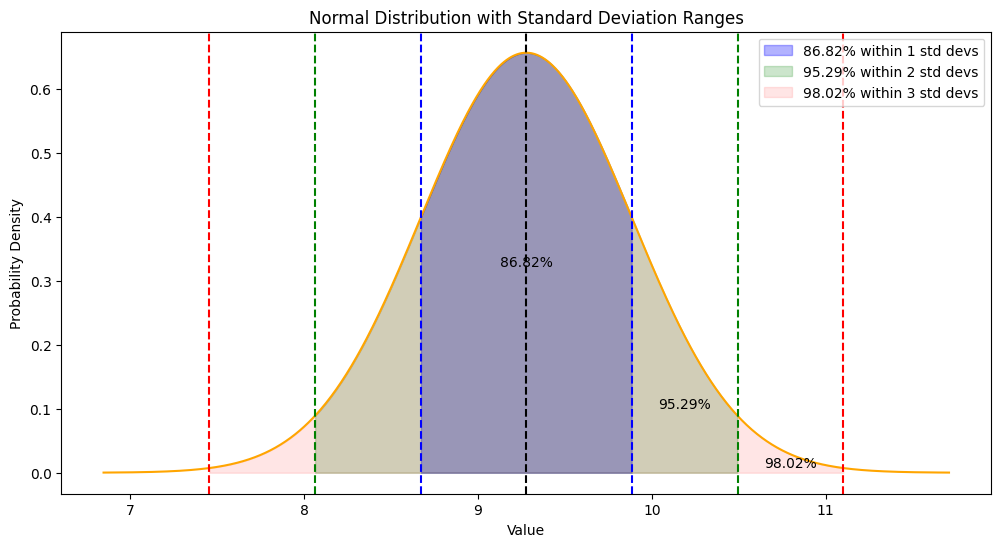

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mean = live_label_data['x'].mean()
std = live_label_data['x'].std()

# Generate data for the normal distribution curve
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)


# Calculate the actual percentages of data points within each standard deviation range
def calculate_percentage_within_std(data, mean, std, num_std):
    return (data[(data >= mean - num_std * std) & (data <= mean + num_std * std)].shape[0] / data.shape[0]) * 100

percentages = [
    calculate_percentage_within_std(live_label_data['x'], mean, std, 1),
    calculate_percentage_within_std(live_label_data['x'], mean, std, 2),
    calculate_percentage_within_std(live_label_data['x'], mean, std, 3)
]
print(percentages)
# Plot the normal distribution curve
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='orange')

# Fill the areas under the curve
plt.fill_between(x, 0, y, where=(x >= mean - std) & (x <= mean + std), color='blue', alpha=0.3, label=f'{percentages[0]:.2f}% within 1 std devs')
plt.fill_between(x, 0, y, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='green', alpha=0.2, label=f'{percentages[1]:.2f}% within 2 std devs')
plt.fill_between(x, 0, y, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.1, label=f'{percentages[2]:.2f}% within 3 std devs')

# Add vertical lines for mean and standard deviations
plt.axvline(mean, color='black', linestyle='--')
plt.axvline(mean - std, color='blue', linestyle='--')
plt.axvline(mean + std, color='blue', linestyle='--')
plt.axvline(mean - 2*std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='green', linestyle='--')
plt.axvline(mean - 3*std, color='red', linestyle='--')
plt.axvline(mean + 3*std, color='red', linestyle='--')

# Annotate the actual percentages
plt.text(mean, norm.pdf(mean, mean, std)/2, f'{percentages[0]:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 1.5*std, norm.pdf(mean + 1.5*std, mean, std)/2, f'{percentages[1]:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 2.5*std, norm.pdf(mean + 2.5*std, mean, std)/2, f'{percentages[2]:.2f}%', horizontalalignment='center', verticalalignment='center')

# Add titles and labels
plt.title('Normal Distribution with Standard Deviation Ranges')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


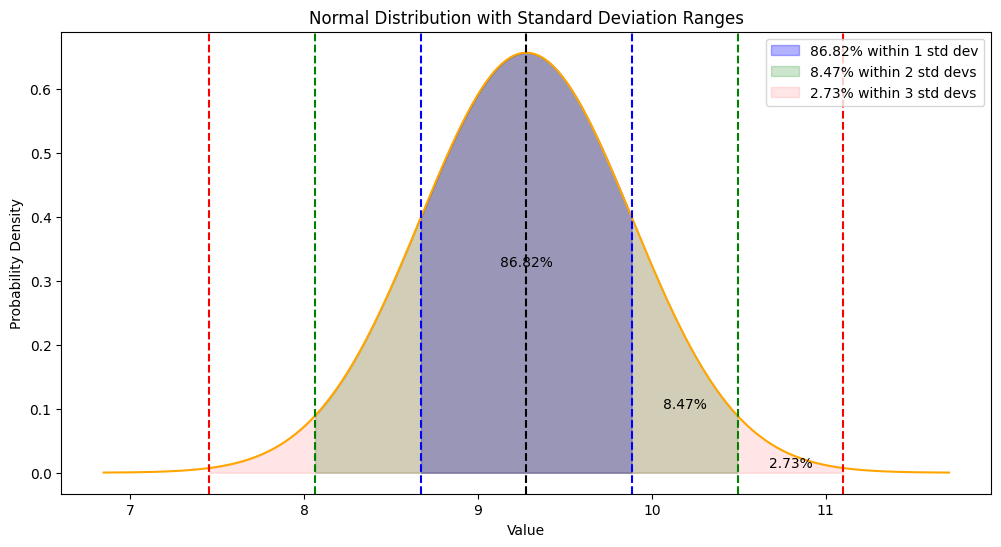

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mean = live_label_data['x'].mean()
std = live_label_data['x'].std()

# Generate data for the normal distribution curve
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)

# Calculate the actual percentages of data points within each standard deviation range
def calculate_percentage_within_std(data, mean, std, num_std):
    return (data[(data >= mean - num_std * std) & (data <= mean + num_std * std)].shape[0] / data.shape[0]) * 100

percentage_1_std = calculate_percentage_within_std(live_label_data['x'], mean, std, 1)
percentage_2_std = calculate_percentage_within_std(live_label_data['x'], mean, std, 2)
percentage_3_std = calculate_percentage_within_std(live_label_data['x'], mean, std, 3)

# Calculate separate percentages
percentage_within_2_std_only = percentage_2_std - percentage_1_std
percentage_within_3_std_only = percentage_3_std - percentage_2_std

# Plot the normal distribution curve
plt.figure(figsize=(12, 6))

plt.plot(x, y, color='orange')

# Fill the areas under the curve
plt.fill_between(x, 0, y, where=(x >= mean - std) & (x <= mean + std), color='blue', alpha=0.3, label=f'{percentage_1_std:.2f}% within 1 std dev')
plt.fill_between(x, 0, y, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='green', alpha=0.2, label=f'{percentage_within_2_std_only:.2f}% within 2 std devs')
plt.fill_between(x, 0, y, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.1, label=f'{percentage_within_3_std_only:.2f}% within 3 std devs')

# Add vertical lines for mean and standard deviations
plt.axvline(mean, color='black', linestyle='--')
plt.axvline(mean - std, color='blue', linestyle='--')
plt.axvline(mean + std, color='blue', linestyle='--')
plt.axvline(mean - 2*std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='green', linestyle='--')
plt.axvline(mean - 3*std, color='red', linestyle='--')
plt.axvline(mean + 3*std, color='red', linestyle='--')

# Annotate the actual percentages
plt.text(mean, norm.pdf(mean, mean, std)/2, f'{percentage_1_std:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 1.5*std, norm.pdf(mean + 1.5*std, mean, std)/2, f'{percentage_within_2_std_only:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 2.5*std, norm.pdf(mean + 2.5*std, mean, std)/2, f'{percentage_within_3_std_only:.2f}%', horizontalalignment='center', verticalalignment='center')

# Add titles and labels
plt.title('Normal Distribution with Standard Deviation Ranges')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


[86.82382758086985, 95.29078316050146, 98.02178455347469]


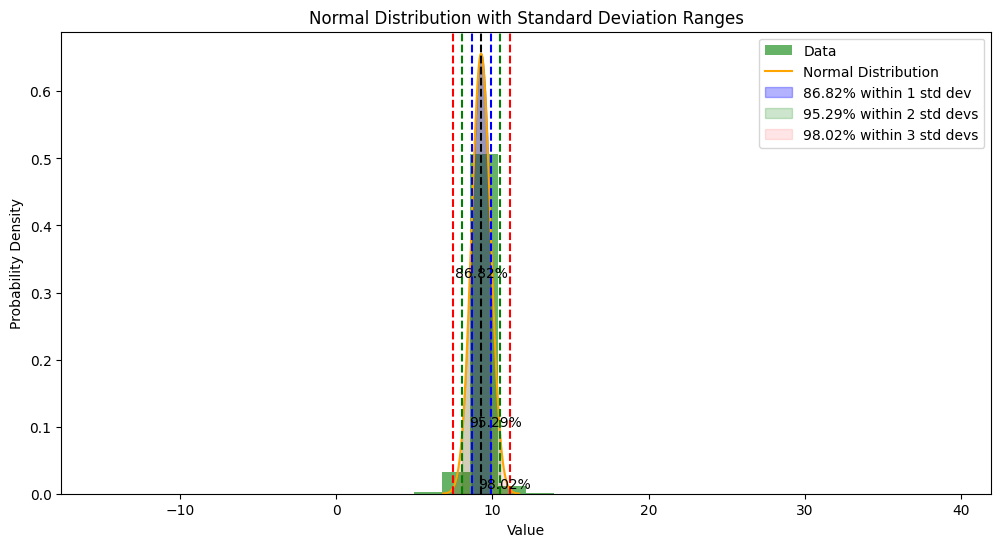

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mean = live_label_data['x'].mean()
std = live_label_data['x'].std()

# Generate data for the normal distribution curve
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)

# Calculate the actual percentages of data points within each standard deviation range
def calculate_percentage_within_std(data, mean, std, num_std):
    return (data[(data >= mean - num_std * std) & (data <= mean + num_std * std)].shape[0] / data.shape[0]) * 100

percentages = [
    calculate_percentage_within_std(live_label_data['x'], mean, std, 1),
    calculate_percentage_within_std(live_label_data['x'], mean, std, 2),
    calculate_percentage_within_std(live_label_data['x'], mean, std, 3)
]
print(percentages)

# Plot the histogram of the data
plt.figure(figsize=(12, 6))
plt.hist(live_label_data['x'], bins=30, density=True, alpha=0.6, color='g', label='Data')

# Plot the normal distribution curve
plt.plot(x, y, color='orange', label='Normal Distribution')

# Fill the areas under the curve
plt.fill_between(x, 0, y, where=(x >= mean - std) & (x <= mean + std), color='blue', alpha=0.3, label=f'{percentages[0]:.2f}% within 1 std dev')
plt.fill_between(x, 0, y, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='green', alpha=0.2, label=f'{percentages[1]:.2f}% within 2 std devs')
plt.fill_between(x, 0, y, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.1, label=f'{percentages[2]:.2f}% within 3 std devs')

# Add vertical lines for mean and standard deviations
plt.axvline(mean, color='black', linestyle='--')
plt.axvline(mean - std, color='blue', linestyle='--')
plt.axvline(mean + std, color='blue', linestyle='--')
plt.axvline(mean - 2*std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='green', linestyle='--')
plt.axvline(mean - 3*std, color='red', linestyle='--')
plt.axvline(mean + 3*std, color='red', linestyle='--')

# Annotate the actual percentages
plt.text(mean, norm.pdf(mean, mean, std)/2, f'{percentages[0]:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 1.5*std, norm.pdf(mean + 1.5*std, mean, std)/2, f'{percentages[1]:.2f}%', horizontalalignment='center', verticalalignment='center')
plt.text(mean + 2.5*std, norm.pdf(mean + 2.5*std, mean, std)/2, f'{percentages[2]:.2f}%', horizontalalignment='center', verticalalignment='center')

# Add titles and labels
plt.title('Normal Distribution with Standard Deviation Ranges')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend
plt.legend()

# Show the plot
plt.show()
